# 🌁 Prédiction les émissions CO2 des bâtiments

**Contexte :** <blockquote> La collectivité d'une ville fait appel à votre agence spécialisée dans l’analyse des émissions CO2 des bâtiments. Le président de la collectivité souhaite mettre en place une stratégie à 4 ans pour réduire les émissions de gaz à effet de serre.

Pour cela, vous disposez d’un de jeu de données sur l’information de 3376 bâtiments et 46 colonnes. Ces données représentent des mesures de relevés annuelles collectées en 2016 par des agents de la ville.

Dans un premier temps, le président souhaite avoir une analyse de ce jeu de données et faire un état de lieu de la ville de Seattle en termes d’émissions CO2 et consommation d’énergie. Dans cette analyse, vous devez expliquer ce qui impact le plus sur les émissions CO2.

Puis, étant donné que les relevés sont coûteux à obtenir, la collectivité aimerait avoir un outil de prédiction, notamment pour l’utiliser sur les bâtiments où l’on n’a pas encore des mesures ou bien dans les années à venir. Ainsi, ils vont pouvoir prédire la consommation des bâtiments et leur taux d'émission CO2.

Ce modèle devrait être déployé et accessible en ligne via une application en utilisant les services d’Azure, tout en mettant en place une démarche CI/CD. </blockquote> 

# 📈 Exploration des données

## Imports

🔎 Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

🔎 Import Dataset

In [2]:
df = pd.read_csv('C:/Users/zaome/Documents/Week_formation/Projet_CO2/2016_Building_Energy_Benchmarking.csv')
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## Informations des données

🔎 Data Shape

In [3]:
df.shape

(3376, 46)

🔎 Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

🔎 Data Descriptive

In [5]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


🔎 Types de données

In [6]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [7]:
df.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

🔎 Valeurs manquantes

In [8]:
df.isnull().sum().sort_values()

OSEBuildingID                         0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
NumberofFloors                        0
YearBuilt                             0
Longitude                             0
Latitude                              0
Neighborhood                          0
DefaultData                           0
CouncilDistrictCode                   0
ComplianceStatus                      0
State                                 0
City                                  0
Address                               0
PropertyName                          0
PrimaryPropertyType                   0
BuildingType                          0
DataYear                              0
TaxParcelIdentificationNumber         0
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SiteEUIWN(kBtu/sf)                    6
SiteEUI(kBtu/sf)                      7
NumberofBuildings                     8


🔎 Valeurs manquantes total

In [9]:
df.isnull().sum().sum()

19952

🔎 Répartitions des Nan

In [10]:
df_nan = pd.DataFrame({'Nan':df.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/df.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
Comments,3376,100.00
Outlier,3344,99.05
YearsENERGYSTARCertified,3257,96.48
ThirdLargestPropertyUseType,2780,82.35
ThirdLargestPropertyUseTypeGFA,2780,82.35
SecondLargestPropertyUseType,1697,50.27
SecondLargestPropertyUseTypeGFA,1697,50.27
ENERGYSTARScore,843,24.97
LargestPropertyUseTypeGFA,20,0.59
LargestPropertyUseType,20,0.59


🔎 Duplicate

In [11]:
df.duplicated().sum()

0

## Data Cleaning

🔎 Drop colonnes

In [12]:
df = df.drop(['YearsENERGYSTARCertified', 'ListOfAllPropertyUseTypes','PropertyName', 'TaxParcelIdentificationNumber',
              'ZipCode', 'Address', 'Electricity(kWh)', 'NaturalGas(therms)', 'State', 'City', 'Comments' , 
              'DefaultData' , 'Outlier', 'YearsENERGYSTARCertified', 'ComplianceStatus', 'SiteEUIWN(kBtu/sf)', 
              'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'], axis=1)

* Non utilisable mais utilisé dans d'autres features : **"YearsENERGYSTARCertified", "ListOfAllPropertyUseTypes"**

* Features redondantes avec 'BuildingID' : **'PropertyName' , 'TaxParcelIdentificationNumber'**

* Features redondantes avec 'latitude' et 'longitude' : **'ZipCode', 'Adresse'**

* Features redondntes avec l'unité : **'Electricity(kWh)', 'NaturalGas(therms)'**

* Colonnes à valeur unique : **'State', 'City'**

* Pas pertinentes : **'Comments' , 'DefaultData' , 'Outlier', 'YearsENERGYSTARCertified', 'ComplianceStatus'**

* Les features avec conditions climatiques : **'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'**

🔎 Valeurs manquantes

In [13]:
df = df.reset_index(drop=True)

In [14]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEUI(kBtu/sf)                   0.002073
NumberofBuildings                  0.002370
Electricity(kBtu)                  0.002666
SteamUse(kBtu)                     0.002666
SourceEUI(kBtu/sf)                 0.002666
NaturalGas(kBtu)                   0.002666
GHGEmissionsIntensity              0.002666
TotalGHGEmissions                  0.002666
LargestPropertyUseTypeGFA       

🔎 Target

In [15]:
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]

🔎 Property

In [16]:
df["SecondLargestPropertyUseType"].fillna("Unknow", inplace=True)
df["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
df["ThirdLargestPropertyUseType"].fillna("Unknow", inplace=True)
df["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

🔎 Types de bâtiments

In [17]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [18]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    287
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

🔎 Drop BuildingType

In [19]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [20]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df = df[~df['BuildingType'].str.contains('SPS-District K-12')]
df = df[~df['BuildingType'].str.contains('Nonresidential WA')]
df = df[~df['BuildingType'].str.contains('Nonresidential COS')]

In [21]:
df['BuildingType'].unique()

array(['NonResidential', 'Campus'], dtype=object)

## Nettoyage colonne PrimaryPropertyType

In [22]:
dictionnary = {  
                 'Supermarket' : ['Supermarket / Grocery Store', 'Supermarket/Grocery Store'],
                 'Office':['Small- and Mid-Sized Office','Large Office','Office'],
                 'Entrepot':['Warehouse','Non-Refrigerated Warehouse', 'Refrigerated Warehouse', 'Self-Storage Facility', 'Self-Storage Facility\n'],
                 'School':['K-12 School','SPS-District K-12','University','College/University'],
                 'Other':['Other'], 
                 'Distribution Center':['Distribution Center','Distribution Center\n'],
                 'Restaurant':['Restaurant','Restaurant\n'],    
                 'Hotel' :['Hotel','Residence Hall','Residence Hall/Dormitory'],
                 'Medical' :['Hospital','Laboratory', 'Senior Care Community','Medical Office']
}

def renamePrimaryPropertyType(value): 
    result=''
    for key in dictionnary:        
        for val in dictionnary[key]:
            if(val == value):                              
                value = key
    return value
        
df['PrimaryPropertyType']=df['PrimaryPropertyType'].apply(renamePrimaryPropertyType)   

df['PrimaryPropertyType'].value_counts()

Office                  456
Entrepot                220
Other                   192
Mixed Use Property      105
Hotel                    97
Retail Store             91
Medical                  78
Worship Facility         71
School                   66
Distribution Center      51
Supermarket              40
Restaurant               12
Low-Rise Multifamily      3
Name: PrimaryPropertyType, dtype: int64

## Nettoyage colonne Neighborhood

In [23]:
df['Neighborhood'].nunique()

18

In [24]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'MAGNOLIA / QUEEN ANNE', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central'], dtype=object)

In [25]:
df.loc[:,'Neighborhood'] = df.loc[:,'Neighborhood'].str.capitalize()

In [26]:
df.loc[:,'Neighborhood'].replace('Delridge neighborhoods','Delridge', inplace=True)

In [27]:
df['Neighborhood'].nunique()

13

In [28]:
df['Neighborhood'].value_counts()

Downtown                 346
Greater duwamish         318
Lake union               141
Magnolia / queen anne    128
Northeast                116
East                     113
Northwest                 72
Ballard                   56
North                     53
Central                   44
Delridge                  36
Southwest                 32
Southeast                 27
Name: Neighborhood, dtype: int64

# 📉 Analyse Univariée

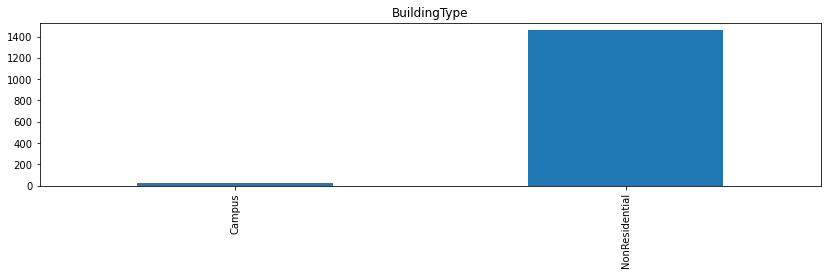

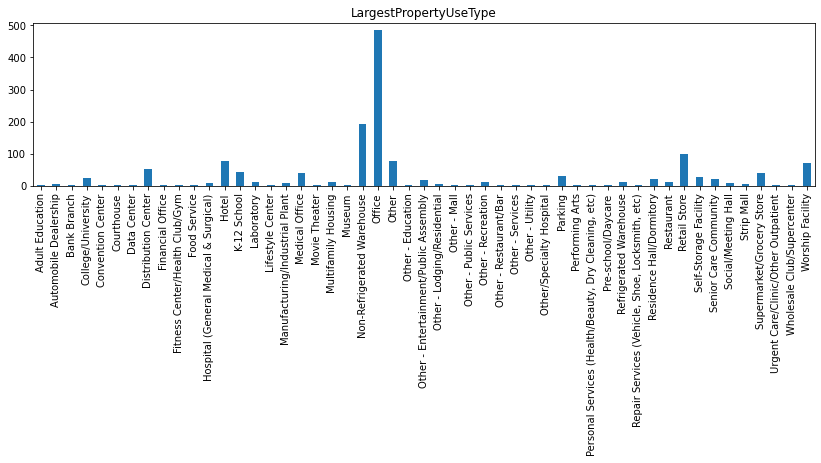

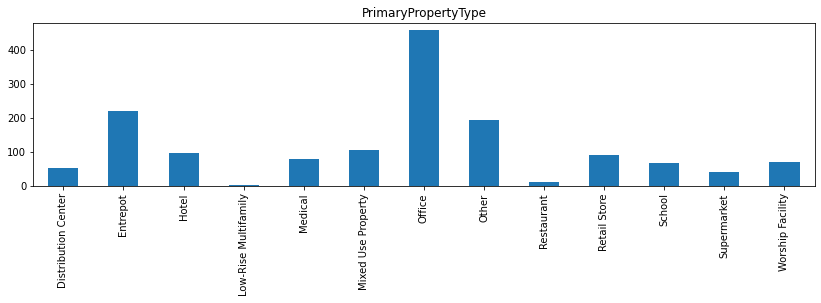

In [29]:
qualitative_columns = ['BuildingType', 'LargestPropertyUseType', 'PrimaryPropertyType']

for column in qualitative_columns:
    fig = plt.figure(figsize=(14,3))
    df[column].value_counts().sort_index(axis=0).plot(kind='bar')
    plt.title(column)
    plt.show()

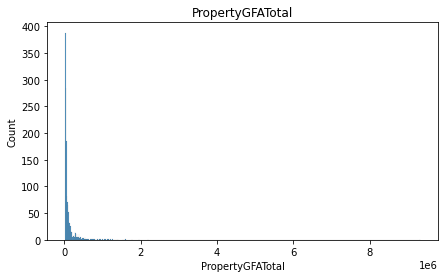

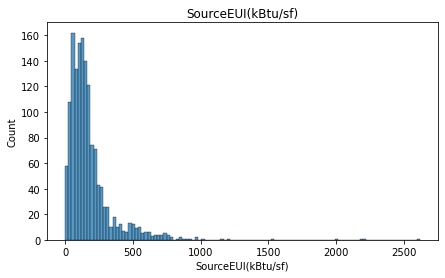

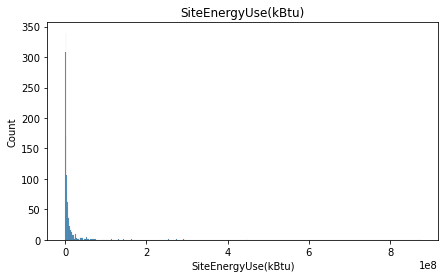

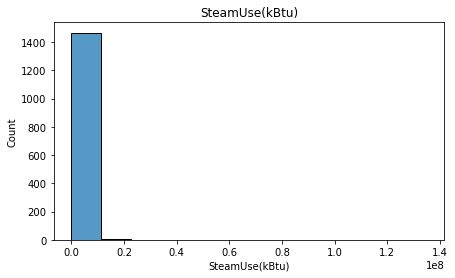

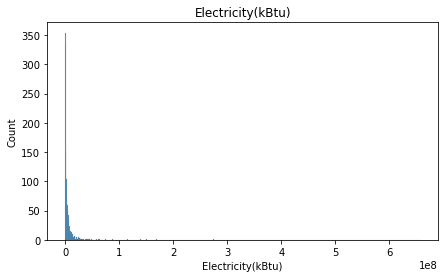

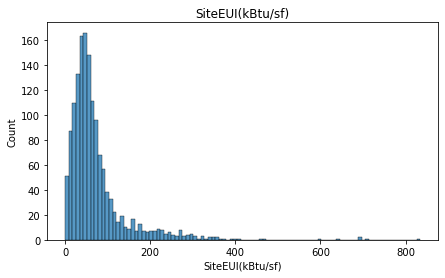

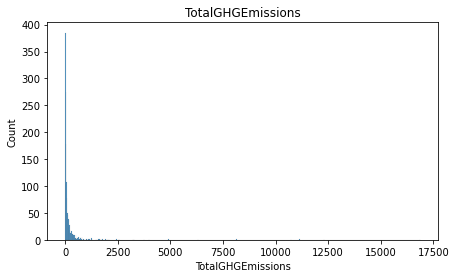

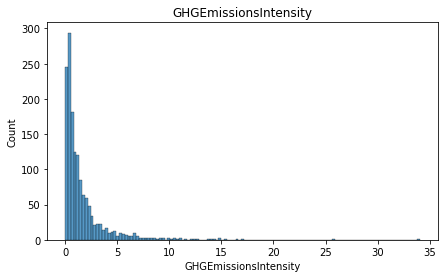

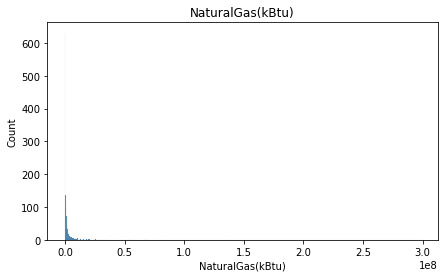

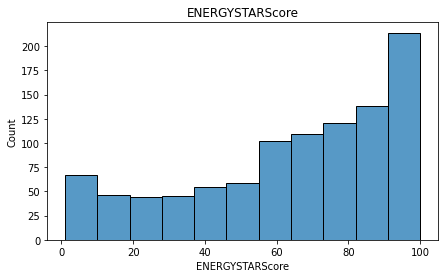

In [30]:
quantitative_columns = ['PropertyGFATotal', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 
                        'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'NaturalGas(kBtu)', 'ENERGYSTARScore']
for column in quantitative_columns:
    fig = plt.figure(figsize=(7,4))
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

* Il y a beaucoup de bâtiments avec une faible surface de plancher brut (comme le nombre d'étage) mais à eux tous il représente la plupart de la surface de plancher.
* Des bâtiments consomment peu d'énergie mais qu'à eux tous ce sont eux qui consomment le plus
* Des batiments qui consomment une très grande quantité d'énergie et à eux tous ils consomment finalement assez peu.

🔎 Age des bâtiments

In [31]:
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']

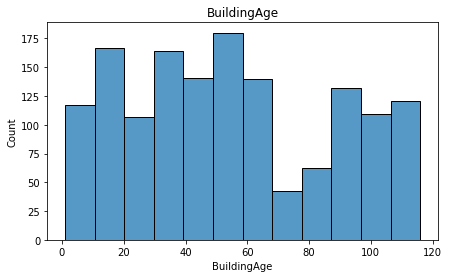

In [32]:
quantitative_columns = ['BuildingAge']
for column in quantitative_columns:
    fig = plt.figure(figsize=(7,4))
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

In [33]:
df = df.drop(['DataYear', 'YearBuilt'], axis=1)

# 📊 Analyse Multivariée 

## Correlation

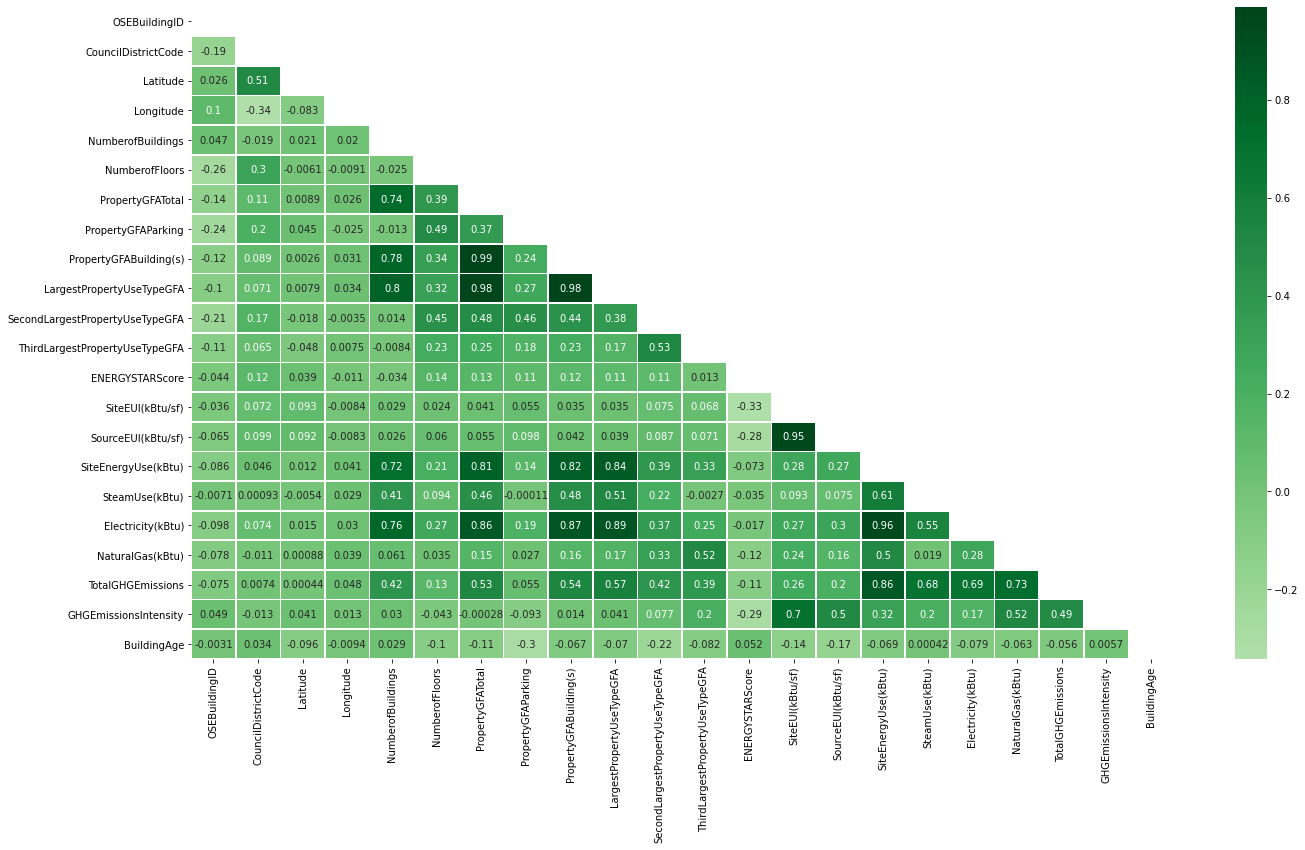

In [48]:
plt.subplots(figsize=(22, 12))
matrix = np.triu(df.corr())

ax = sns.heatmap(df.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='Greens',
                 center=0,
                 linewidths=.7)
plt.show()

* Pour les varaibles à prédire TotalGHGEmissions et SiteEnergyUse(kBtu), on remarque des corrélations linéaires quasi similaires avec les variables de relevés (les consommations) mais également avec le nombre de batiments ou d'étages ainsi que les surfaces au sol.
* On remarque sur ce Heatmap de fortes corrélations linéaires entre variables. Ces corrélations peuvent amener des problèmes de colinéarité dans nos futurs modèles.

## Pairplot

In [37]:
corr = df.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.7)).any(axis=0)]
display(corr_columns)

Index(['NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

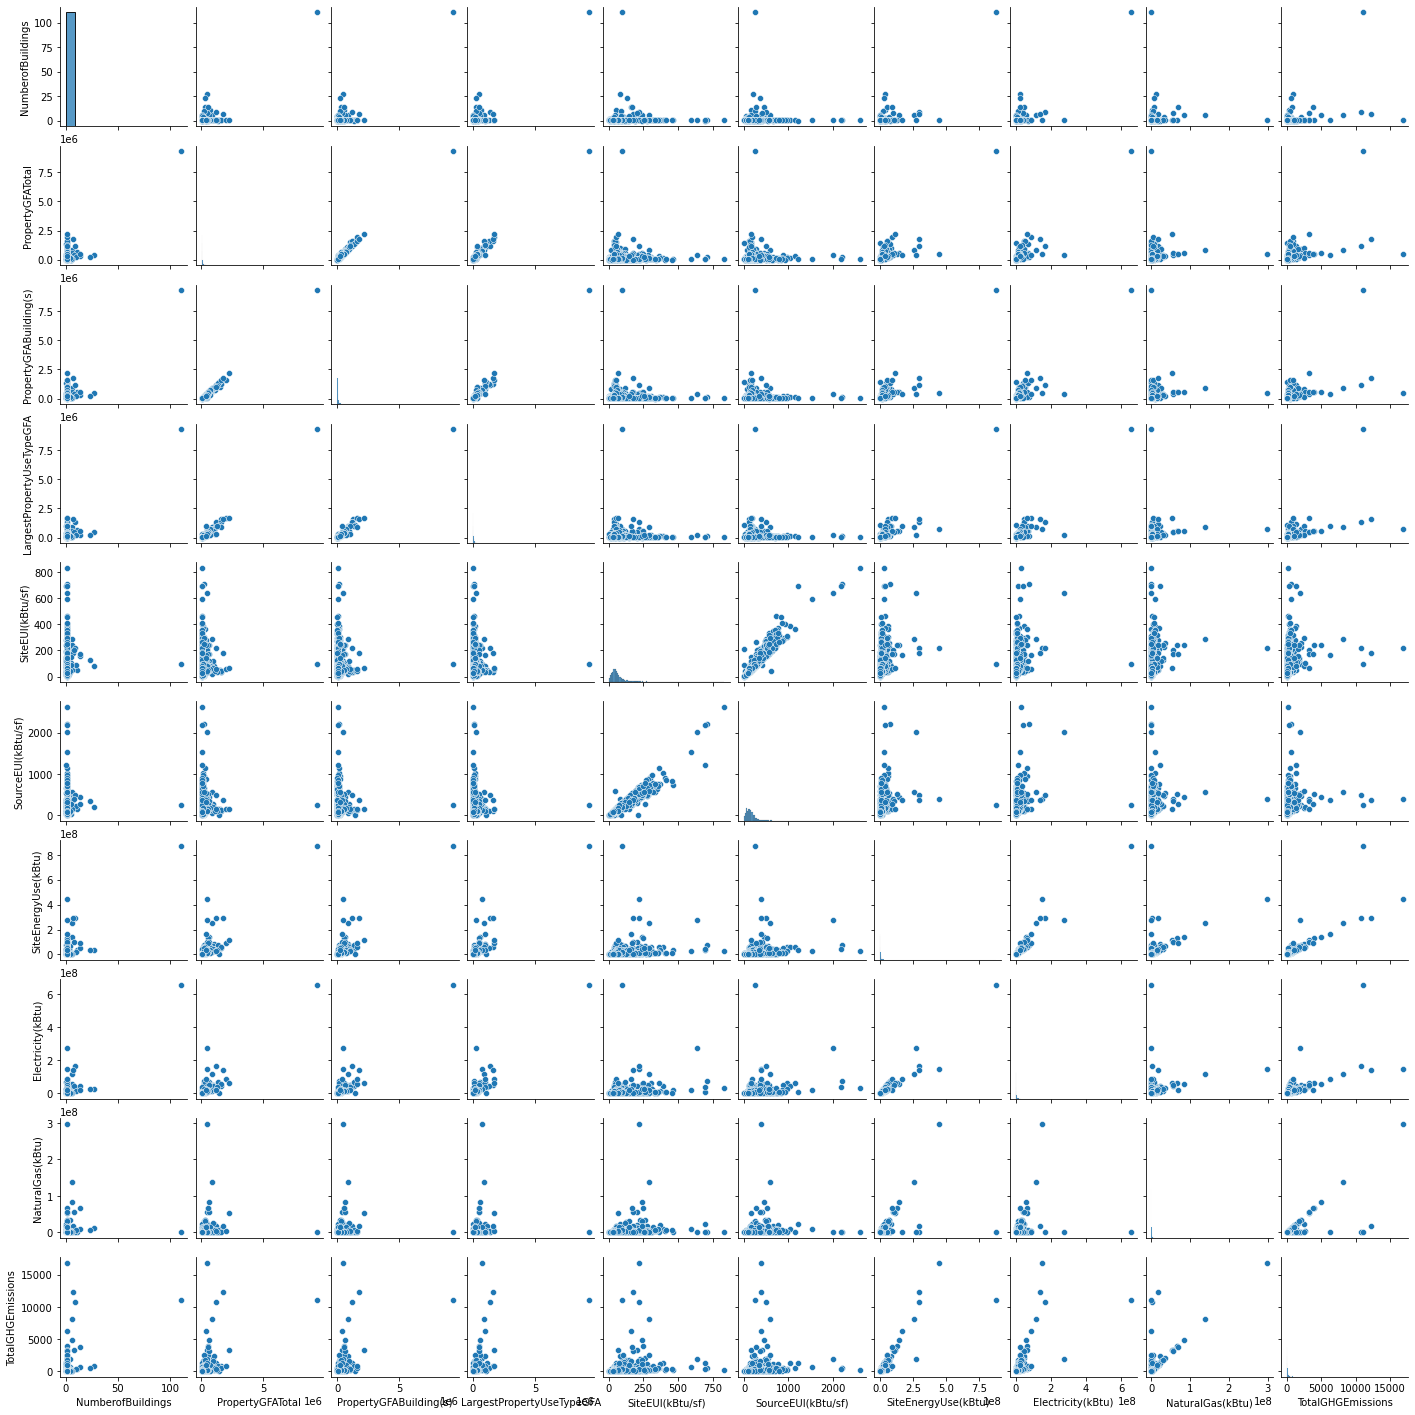

In [38]:
sns.pairplot(df[corr_columns], height = 2)

* On remarque que les variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables.

## Distribution des variables cibles sur Neighborhood

In [39]:
sorted(list(df.select_dtypes(include=['object']).columns))

['BuildingType',
 'LargestPropertyUseType',
 'Neighborhood',
 'PrimaryPropertyType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

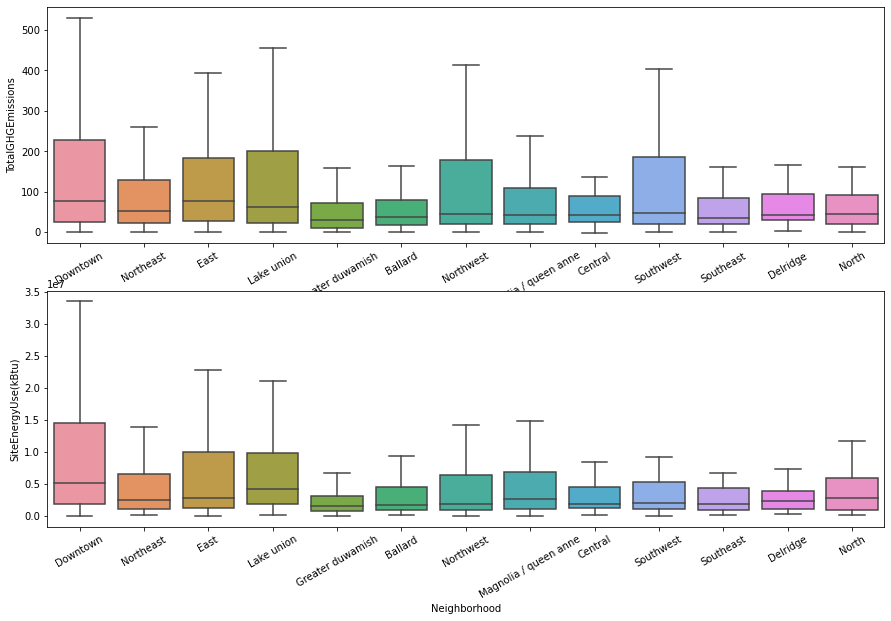

In [40]:
fig = plt.figure(figsize=(15,20))
columntocheck = [
'TotalGHGEmissions',
'SiteEnergyUse(kBtu)'
 ]
for i in range(len(columntocheck)):

    fig.add_subplot(4,1,i+1)
    col = columntocheck[i]
    ax = sns.boxplot(x="Neighborhood", y=col, data=df,showfliers=False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)

plt.show()

## Distribution des variables cibles sur BuildingType

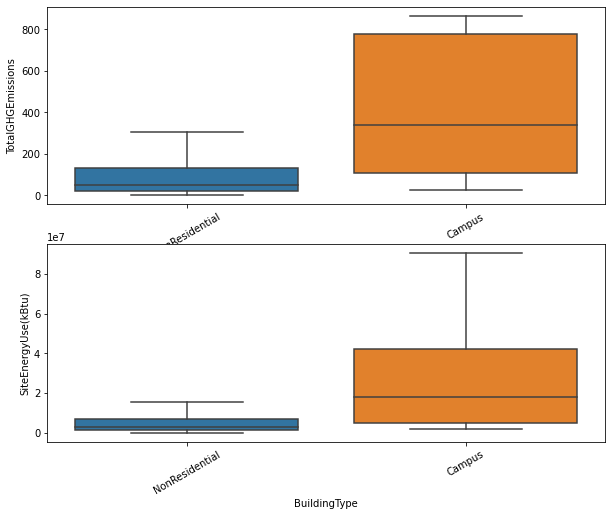

In [41]:
fig = plt.figure(figsize=(10,8))
columntocheck = [
'TotalGHGEmissions',
'SiteEnergyUse(kBtu)'
 ]
# fig=plt.figure(figsize=[18,25])
for i in range(len(columntocheck)):

    fig.add_subplot(2,1,i+1)
    col = columntocheck[i]
    ax = sns.boxplot(x="BuildingType", y=col, data=df,showfliers=False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)

plt.show()

## Distribution des variables cibles sur PrimaryPropertyType

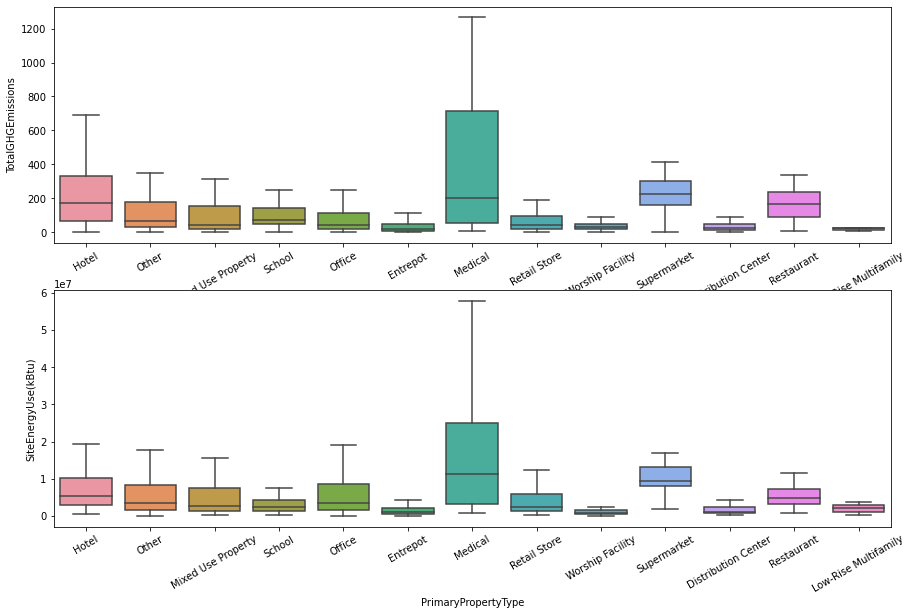

In [42]:
fig = plt.figure(figsize=(15,20))
columntocheck = [
'TotalGHGEmissions',
'SiteEnergyUse(kBtu)'
 ]
# fig=plt.figure(figsize=[18,25])
for i in range(len(columntocheck)):

    fig.add_subplot(4,1,i+1)
    col = columntocheck[i]
    ax = sns.boxplot(x="PrimaryPropertyType", y=col, data=df,showfliers=False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)

plt.show()

# 🌎 Repartition des batiments par latitude longitude

In [43]:
import folium
import folium.plugins
seattle_lat = 47.6062
seattle_lon = -122.3321
echantillon = df
seattle_map = folium.Map(location=[seattle_lat,seattle_lon], zoom_start=11)
#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(df.Latitude, df.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

# 🆕 New csv

In [44]:
df.shape

(1482, 28)

In [45]:
df.to_csv("Clean.csv")